In [55]:
#this is to plot inside the notebook
%matplotlib inline

# Let's start by importing the libraries you will be using in this assignment
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib

# A seed for the random number generator so all results are reproducible
np.random.seed(15)

# Makes our plots look nicer
matplotlib.style.use("seaborn-notebook")

# Let's also hide unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# Assignment 1 Set 2: Learning Categories for Mammals and Birds

## A Perceptron for Mammals and Birds
This part of the assignment is designed to look at neural networks in the context of a more complicated classification problem, and to look at a data set related to human concepts and categories.


### Classifying animals

We are going to figure out whether a perceptron can learn to distinguish animals into two classes: mammals and birds. In the data folder, there should be 9 different files. 

Load the data in the notebook:

In [56]:
# import the data to train the network on
birds = np.genfromtxt(open('./data/birds.txt', "rb"), delimiter=",").T
mammals = np.genfromtxt(open('./data/mammals.txt', "rb"), delimiter=",").T

birds_tok = np.genfromtxt(open('./data/birds_tok.txt', "rb"),dtype='str', delimiter=",")
mammals_tok = np.genfromtxt(open('./data/mammals_tok.txt', "rb"),dtype='str', delimiter=",")

feats = np.genfromtxt(open('./data/feats.txt', "rb"),dtype='str', delimiter=",")

To train the perceptron, we will be using data from [McRae et al. (2005)(1)](#references) . You may want to have a quick read through the paper before doing the assignment.

To inspect the data you can use: 
    
`print(filename)` 

The **birds** and **mammals** matrices should have 20 rows and 16 columns. Each column in the matrix corresponds to a visual feature (e.g., has legs, flies) and each row to an animal (e.g., stork, pigeon). The features are 16 in total, and the animals are 20 per matrix (i.e., 20 birds and 20 mammals).

Inspect the different files in the notebook, and make sure that they are in the correct dimensions (using .shape).

( 2 points)

In [57]:
print(birds)
print(mammals)
print(birds_tok)
print(mammals_tok)
print(feats)

[[ 0.          0.          0.06329114  0.          0.10126582  0.11392405
   0.27848101  0.          0.          0.          0.          0.          0.
   0.          0.07594937  0.        ]
 [ 0.          0.          0.          0.          0.15107914  0.          0.
   0.          0.          0.          0.          0.07194245  0.          0.
   0.          0.05035971]
 [ 0.09615385  0.          0.10897436  0.          0.13461538  0.
   0.05769231  0.          0.          0.          0.13461538  0.06410256
   0.          0.          0.05769231  0.        ]
 [ 0.04761905  0.          0.22857143  0.          0.1047619   0.
   0.14285714  0.          0.          0.          0.          0.17142857
   0.          0.          0.          0.        ]
 [ 0.19        0.          0.1         0.          0.06        0.          0.11
   0.          0.          0.          0.          0.          0.          0.
   0.          0.09      ]
 [ 0.          0.          0.21348315  0.          0.168539

In [58]:
birds_shape =  birds.shape 
mammals_shape = mammals.shape

In [59]:
"""Check that *mammals* and *birds* matrices are the  correct shape"""
assert(birds_shape == mammals_shape)
assert(mammals_shape == (20,16))

The features are defined in the vector `feats`, the birds are defined in vector `birds_tok`, and the mammals in vector `mammals_tok`. 

The visual features were elicited from humans who were presented with a word (e.g., *tiger*) and asked to list its properties. The cells in the mammals and birds matrices correspond to the number of humans who listed a specific feature for each word. The counts are normalized so that each matrix row sums to one.

The goal is to train a perceptron that distinguishes between mammals and birds, by deciding whether a given input is a bird. In other words, the perceptron should output 1 in the case of a bird and 0 in the case of a mammal. You will need a matrix, input, containing all training examples, and a target vector, targets birds, whose entry i is 1 if example i is a bird, and 0 otherwise (use `np.zeros(n)` and `np.ones(n)`) for this.

For this, use `np.concatenate((matrix1,matrix2))` and use `np.zeros(n)` and `np.ones(n))` for the target vector. 

(1 point)

In [60]:
# create the training data matrix X_train and target vector y_train

X_train = np.concatenate((birds, mammals))
y_train = np.concatenate((np.ones(20),np.zeros(20)))
tokens_train = np.concatenate((birds_tok, mammals_tok))
print(X_train)
print(y_train)

[[ 0.          0.          0.06329114  0.          0.10126582  0.11392405
   0.27848101  0.          0.          0.          0.          0.          0.
   0.          0.07594937  0.        ]
 [ 0.          0.          0.          0.          0.15107914  0.          0.
   0.          0.          0.          0.          0.07194245  0.          0.
   0.          0.05035971]
 [ 0.09615385  0.          0.10897436  0.          0.13461538  0.
   0.05769231  0.          0.          0.          0.13461538  0.06410256
   0.          0.          0.05769231  0.        ]
 [ 0.04761905  0.          0.22857143  0.          0.1047619   0.
   0.14285714  0.          0.          0.          0.          0.17142857
   0.          0.          0.          0.        ]
 [ 0.19        0.          0.1         0.          0.06        0.          0.11
   0.          0.          0.          0.          0.          0.          0.
   0.          0.09      ]
 [ 0.          0.          0.21348315  0.          0.168539

In [61]:
"""Check that the training and target matrices are in the correct shape"""
assert(np.shape(X_train) == (40,16))


Now create the perceptron, similar to how we created the MLP and linear regression in assignment 1 part 1. Create a new perceptron and fit it to the data like we did in task 1.

(2 points)


In [62]:
#import the perceptron model from scikit-learn
from sklearn.linear_model import Perceptron
net1 = Perceptron()

net1.fit(X_train, y_train)

predictions = net1.predict(X_train)

Report the categorization error of the perceptron on the training data using the mean_squared_error function imported in the cell below. 

(2 points)

In [63]:
# import mean squared error from scikit-learn
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(predictions, y_train)
MSE

0.0

In [64]:
''' check for MSE value'''
assert MSE is not None


Did the model classify all examples correctly? You can see which examples were classified incorrectly by looking at the differences between the `.predict(data)` array and the target array.

(2 points)

In [65]:
predictions-y_train

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

Briefly discuss the classification results. 

(3 points)

> There is no error in the predictions of the perceptron, this is due to the fact that it is predicting the result of training data that I have already fit to the perceptron.

# Comparing different models.

Now we'll be using a slightly more complicated neural network, resembling the one we saw in Tutorial 3. It has more units in its hidden layer, but otherwise it's very similar. It might be helpful to know that unlike our in-class example, the weights don't always start at zero or another fixed value. Like with the perceptron, fit the new network to the training data and assess whether it's learned the correct classification by making it predict the categories of the animals it's been trained on.


(3 points)

In [66]:
#Let's create the network - we use the logistic sigmoid function (logistic) as activation function
# and stochastic gradient descent ('sgd') to train the network
from sklearn.neural_network import MLPClassifier

net2 = MLPClassifier(activation='logistic', solver='sgd', tol=0,learning_rate_init=.08, max_iter=200)

net2.fit(X_train, y_train)

predictions2 = net2.predict(X_train)

Calculate the MSE of the new network and examine its performance.

(2 points)

In [67]:
MSE_result = mean_squared_error(predictions2, y_train)
MSE_result

0.0

In [68]:
'''test that MSE result is not NoneType'''
assert MSE_result is not None


 Did the model learn the correct classification with the set parameters? Discuss. 
 
 (2 points)

> Yes because the MSE_result is 0

Now, recreate and re-fit the model ten times to the training data (`using net2.fit` and `net2.predict`), and compare the performances. To do this, store the MSE of each run in an array.

(2 points)

In [80]:
MSE_multiple_runs = []

for i in range(10):
    net2 = MLPClassifier(activation='logistic', solver='sgd', tol=0,learning_rate_init=.08, max_iter=200)
    net2.fit(X_train, y_train)
    net_2_predictions = net2.predict(X_train)
    MSE = mean_squared_error(net_2_predictions, y_train)
    MSE_multiple_runs.append(MSE)

In [81]:
''' check length of MSE array'''
assert len(MSE_multiple_runs)==10

Make a bar plot of all 10 MSEs here using `plt.bar`. Note that `plt.bar` needs two arrays: one for the indices, and one for the values. For example, to plot `[1,2,3,5,8]`:

    plt.bar(np.arange(5), [1,2,3,5,8]) 

Remember to add title and x- and y-labels.

(3 points)

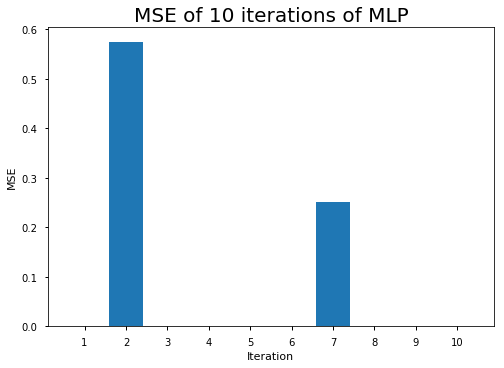

In [82]:
plt.bar(np.arange(10) + 1, MSE_multiple_runs, tick_label = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.title('MSE of 10 iterations of MLP', fontsize = 20)
plt.xlabel('Iteration')
plt.ylabel('MSE')
#plt.xticks()

Briefly discuss your results. Would you observe the same results with the perceptron?

(3 points)

> The MSE is different for each iteration of the MLP. This is because with each iteration the MLP is redefined and new weights are generated for it. We would not get the same results with the perceptron as the weights are not randomly generated.

## Generalizing  to new data

Let us now see how well the perceptron can generalize to unseen animals. Generalization happens when a model re-uses what it has learned in the training data to examples it did not see during training. 

You will have to prepare the test data in the same way as the training data: you will again need a matrix with all test examples (the input to the perceptron), and a target vector. Make sure that your use of zeros and ones matches mammals and birds in the same way that it did during the training phase!

( 2 points)

In [72]:
#import test data here
mammals_test = np.genfromtxt(open('./data/mammals_test.txt', "rb"), delimiter=",").T
mammals_tok_test = np.genfromtxt(open('./data/mammals_tok_test.txt', "rb"),dtype='str', delimiter=",")

birds_test = np.genfromtxt(open('./data/birds_test.txt', "rb"), delimiter=",").T
birds_tok_test = np.genfromtxt(open('./data/birds_tok_test.txt', "rb"),dtype='str', delimiter=",")

In [73]:
X_test = np.concatenate((birds_test, mammals_test))
y_test = np.concatenate((np.ones(15), np.zeros(15)))
test_tokens = np.concatenate((birds_tok_test, mammals_tok_test))

In [74]:
'''check shapes for test data '''
assert(X_test.shape == (30,16))


Now test the perceptron without re-training it on the data (i.e. using `net1.predict(X_test)`). This means that the network is now predicting the category of mammals and birds that it has not seen.

(2 points)

In [86]:
net1_test_predictions = net1.predict(X_test)
test_MSE = mean_squared_error(net1_test_predictions, y_test)
test_MSE

0.10000000000000001

In [84]:
'''check test set predictions'''
assert(len(net1_test_predictions) == len(X_test))


Discuss the results briefly (one or two sentences).
 
(2 points)

> The perceptron does not correctly predict all of the test data. This is because the peceptron has not been retrained to make it more accurate. The MSE is also constant, no matter how many times the perceptron is run.

## Inspecting model predictions.
Which animals did the neural network not classify correctly? Complete the function below so that it prints the misclassified animals and the weight attributed to each feature.

( 2 points)

In [77]:
print(test_MSE)
for index, true_label in enumerate(y_test):
    if net1_test_predictions[index]!=true_label: # if prediction does not match the true category
        # here, print the name of the animal corresponding to the index
        print(test_tokens[index])
        
        # below, print the feature weights of the animal corresponding to the index
        
        print(X_test[index])

0.1
dolphin
[ 0.10344828  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.        ]
platypus
[ 0.          0.          0.          0.          0.16666667  0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.        ]
bat
[ 0.          0.          0.22352941  0.          0.          0.          0.
  0.12941176  0.          0.          0.          0.30588235  0.          0.
  0.          0.07058824]


Can you find an explanation for that? Looking at the weights that the network learned in conjunction with the McRae features (corresponding to the `feats` file) the weights operate on might help you answer the question. 

First print out the weights of the perceptron by using the `net1.coef_` function.

(1 point)

In [181]:
print(net1.coef_)
print(feats)


[[ 0.02886248 -0.11827957  0.24719101 -0.27461641  0.29714655 -0.06741573
   0.57451212 -0.06741573 -0.07865169 -0.55       -0.2853691   0.3759046
  -0.07865169 -0.14606742 -0.16052632  0.05035971]]
['beh_-_eats' 'beh_-_eats_grass' 'beh_-_flies' 'has_4_legs' 'has_a_beak'
 'has_a_tail' 'has_feathers' 'has_fur' 'has_hooves' 'has_horns' 'has_legs'
 'has_wings' 'is_brown' 'is_fast' 'is_large' 'is_small']


Discuss the animals that the model failed to classify correctly using the learned weights of the model and the features of the misclassified animals.

(5 points)

> The three animals that it failed to classify all have features that could confuse what group they are a part of. The dolphin does not have any legs and the 'has 4 legs' has quite a large weight applied to it. The platypus has a beak which would make it much more likely to be classified as a bird. The bat has wings and can fly, the 'beh - flies' feature has a relatively large weight applied to it making it likely for it to be misclassified as a bird.

## Comparing models on the test set.
Now, calculate the MLP (`net2`) error on the test set. How does it compare to the single layer perceptron performance?

Frist print out the MSEs for `net2` below:

(3 points)

In [163]:
#net2 = MLPClassifier(activation='logistic', solver='sgd', tol=0,learning_rate_init=.08, max_iter=200)
net2.fit(X_train, y_train)
net2_test_predictions = net2.predict(X_test)
print (mean_squared_error(net2_test_predictions, y_test))
for index, true_label in enumerate(y_test):
    if net2_test_predictions[index]!=true_label:
        print(test_tokens[index])
        print(X_test[index])

0.0666666666667
platypus
[ 0.          0.          0.          0.          0.16666667  0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.        ]
bat
[ 0.          0.          0.22352941  0.          0.          0.          0.
  0.12941176  0.          0.          0.          0.30588235  0.          0.
  0.          0.07058824]


Now discuss the MSEs, the number of erroneous classifications, and the differences/similarities between animals the network was not able to classify.

> The MSE is not constant each time the MLP is run. Sometimes the MSE is higher than the perceptron and sometimes it is lower, this is also the case for the number of erroeneous classifications. Both networks struggle to correctly classify a platypus and a bat, this is likely due to them having features most commonly associated with birds, like wings and a beak.

## Reliability 

Do ten iterations, where in each iteration you create the network (net2) again, train it and examine its performance on the training and test data. Remember to NOT fit the network on the test data. With the test set, the model is meant to predict the category of animals it has never seen before (i.e. animals it has not been trained on).

On the same graph, plot the performance of each iteration on the test set (using `plt.bar`). Don’t forget to add labels to both axes.

You can plot the test error on top of the train error in your bar plots by passing the parameter `bottom` in the `plt.bar()` function. Add separate labels for training and test error. 

(3 points)

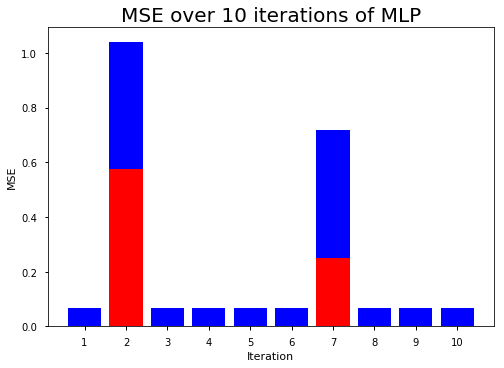

In [26]:
MSE_train = []
MSE_test = []
for i in range(10):
    net2 = MLPClassifier(activation='logistic', solver='sgd', tol=0,learning_rate_init=.08, max_iter=200)
    net2.fit(X_train, y_train)
    net_2_predictions_train = net2.predict(X_train)
    MSE_train.append(mean_squared_error(net_2_predictions_train, y_train))
    net_2_predictions_test = net2.predict(X_test)
    MSE_test.append(mean_squared_error(net_2_predictions_test, y_test))

plt.bar(np.arange(10) + 1, MSE_train, bottom= 0, color='r')
plt.bar(np.arange(10) + 1, MSE_test, bottom = MSE_train, tick_label = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], color='b')

plt.title('MSE over 10 iterations of MLP', fontsize = 20)
plt.xlabel('Iteration')
plt.ylabel('MSE')

Discuss your observations briefly.

(2 points)

> When the MLP has a MSE of 0 with the training data then the MSE of the test data is constant. If the MLP has a MSE greater than 0 with the training data then the MSE of the test data is significantly increased.

## Playing with parameters 
Experiment with the following parameters:
- Learning rate: change the learning rate settings  ($\texttt{learning_rate_init: e.g. `1, 0.1,0.01,0.001`) 
- Number of hidden layers and units vary the number of units in the hidden layer, and try to add a second hidden layer. (e.g. `(25,), (80,),(100,), (100,80), (100,100)`)
- Iterations: change the max number of iterations. E.g. `20,100,500,1000, 5000`

Follow the same procedure as before, running each simulation 10 times (for each new parameter).

**Notes**:


- To compare different parametrizations, you should plot the mean and standard error for the 10 runs of each model with a given parametrization. You can use np.mean np.std to compute these. You plot this through the `yerr` parameter in the `plt.bar()` function. You should pass two arrays to the plt.bar function: the means and the std  of different parametrizations.

- Make three plots. In each, vary either the learning rate, the number of hidden layers and the iterations.

(10 points) 

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.066666666666666666]
[0.5, 0.5, 0.033333333333333333, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.29999999999999999, 0.5, 0.5, 0.59999999999999998, 0.36666666666666664, 0.5, 0.29999999999999999, 0.5, 0.10000000000000001, 0.5]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.066666666666666666, 0.45333333333333331, 0.41666666666666669, 0.5]
[0.0, 0.0, 0.13999999999999999, 0.14083086782851739, 0.0]


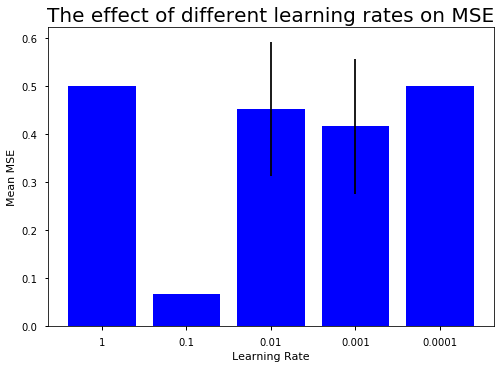

In [174]:
MSE_mean = []
MSE_se = []
for lr in [1,0.1,0.01,0.001,0.0001]:
    model_results = []
    for i in range(10):
        net2 = MLPClassifier(activation='logistic', solver='sgd', tol=0,learning_rate_init=lr, max_iter=200)
        net2.fit(X_train, y_train)
        net_2_predictions_test = net2.predict(X_test)
        model_results.append(mean_squared_error(net_2_predictions_test, y_test))
    print(model_results)
    MSE_mean.append(np.mean(model_results))
    MSE_se.append(np.std(model_results))
    
plt.bar(np.arange(5) + 1, MSE_mean, bottom = 0, tick_label = [1,0.1,0.01,0.001,0.0001], color='b', yerr = MSE_se)

plt.title('The effect of different learning rates on MSE', fontsize = 20)
plt.xlabel('Learning Rate')
plt.ylabel('Mean MSE')
print(MSE_mean)
print(MSE_se)

[0.066666666666666666, 0.5, 0.5, 0.066666666666666666, 0.5, 0.066666666666666666, 0.066666666666666666, 0.5, 0.066666666666666666, 0.066666666666666666]
[0.5, 0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.5, 0.46666666666666667, 0.43333333333333335, 0.5, 0.066666666666666666, 0.43333333333333335]
[0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.066666666666666666]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0.5, 0.5, 0.46666666666666667, 0.5, 0.5, 0.5, 0.5, 0.5, 0.53333333333333333, 0.5]
[0.24000000000000005, 0.30999999999999994, 0.066666666666666666, 0.5, 0.5]
[0.21228911104120879, 0.20002777584903331, 0.0, 0.0, 0.014907119849998594]


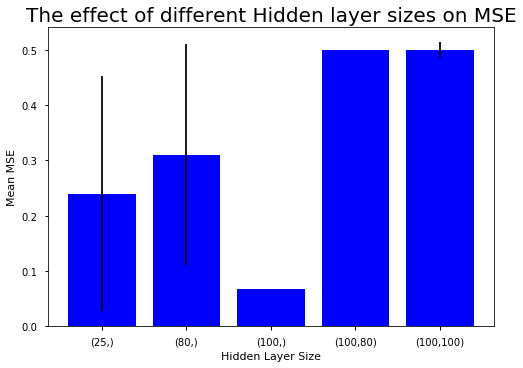

In [176]:
MSE_mean = []
MSE_se = []

for hl in [(25,), (80,),(100,), (100,80), (100,100)]:
    model_results = []
    for i in range(10):
        net2 = MLPClassifier(activation='logistic', solver='sgd',hidden_layer_sizes= hl,
                             learning_rate_init=0.1, max_iter=250)
        net2.fit(X_train, y_train)
        net_2_predictions_test = net2.predict(X_test)
        model_results.append(mean_squared_error(net_2_predictions_test, y_test))
    print(model_results)
    MSE_mean.append(np.mean(model_results))
    MSE_se.append(np.std(model_results))
    
plt.bar(np.arange(5) + 1, MSE_mean, bottom = 0, tick_label = ["(25,)", "(80,)","(100,)", "(100,80)", "(100,100)"], color='b', yerr = MSE_se)

plt.title('The effect of different Hidden layer sizes on MSE', fontsize = 20)
plt.xlabel('Hidden Layer Size')
plt.ylabel('Mean MSE')
print(MSE_mean)
print(MSE_se)


[0.13333333333333333, 0.16666666666666666, 0.43333333333333335, 0.066666666666666666, 0.23333333333333334, 0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.10000000000000001]
[0.033333333333333333, 0.066666666666666666, 0.066666666666666666, 0.43333333333333335, 0.066666666666666666, 0.066666666666666666, 0.59999999999999998, 0.10000000000000001, 0.066666666666666666, 0.066666666666666666]
[0.066666666666666666, 0.066666666666666666, 0.46666666666666667, 0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.36666666666666664, 0.066666666666666666, 0.066666666666666666]
[0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.26666666666666666, 0.066666666666666666, 0.5, 0.066666666666666666, 0.59999999999999998, 0.13333333333333333, 0.066666666666666666]
[0.59999999999999998, 0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.066666666666666666, 0.53333333333333333, 0.0666666666666

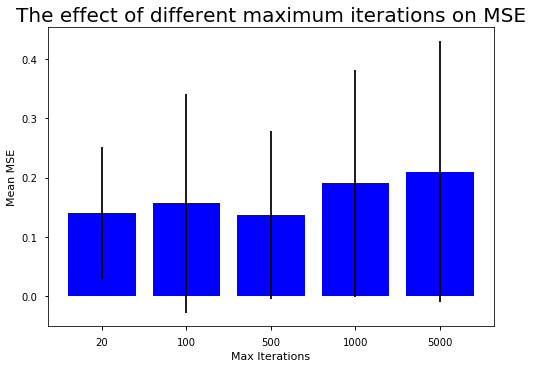

In [175]:
MSE_mean = []
MSE_se = []
for it in [20,100,500,1000, 5000]: 
    model_results = []
    for i in range(10):
        
        net2 = MLPClassifier(activation='logistic', solver='sgd', tol=0,
                             learning_rate_init=0.08, max_iter=it)
        net2.fit(X_train, y_train)
        net_2_predictions_test = net2.predict(X_test)
        model_results.append(mean_squared_error(net_2_predictions_test, y_test))
    print(model_results)
    MSE_mean.append(np.mean(model_results))
    MSE_se.append(np.std(model_results))
    
plt.bar(np.arange(5) + 1, MSE_mean, bottom = 0, tick_label = [20,100,500,1000, 5000], color='b', yerr = MSE_se)

plt.title('The effect of different maximum iterations on MSE', fontsize = 20)
plt.xlabel('Max Iterations')
plt.ylabel('Mean MSE')
print(MSE_mean)
print(MSE_se)


What is the best result you get on the training and test set, respectively? What were the corresponding parameter settings? Discuss your results and the effect of each parameter on the performance of the model.

You might want to have a look at Chapter 6 in "An Introduction to Neural Networks" (Gurney, 1997) for information.

(8 points)

> In terms of learning rate, the one that produced the lowest mean MSE was 0.1. The difference in mean MSE was quite large compared to the other learning rates. The most ideal hidden layer size out of the five that I tested was (100,), the difference in mean MSE compared to the other sizes was significant. For the number of maximum iterations, the different sizes did not seem to have much of a substantial effect on the mean MSE. Each time the MLP was run a different size of max iteration would have the lowest mean MSE.

# <a id='references'>References</a> 
[1] [K. McRae, G.S. Cree, M.S. Seidenberg, C. McNorgan. 2005. Semantic Feature Production Norms for a Large Set of Living and Nonliving Things. Behavior Research Methods, 37(4):547-59.](https://link.springer.com/content/pdf/10.3758/BF03192726.pdf)
